# Daily report on osm-compare on osmcha

[Osmcha](http://osmcha.mapbox.com/) uses `osm-compare` to both label interesting changesets and flag suspecious changesets. With this notebook, I want to make it super easy to get daily stats about what the compare functions did on a particular day on osmcha.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download changesets from osmcha

In [3]:
import datetime
start_date = datetime.datetime(2017, 4, 4)
end_date = start_date + datetime.timedelta(days=1)
url = 'http://osmcha.mapbox.com/?date__gte={}&date__lte={}&is_suspect=False&is_whitelisted=All&checked=All&all_reason=True&render_csv=True'.format(start_date.date(), end_date.date())

In [4]:
changesets = pd.read_csv(url)
changesets.head(2)

,ID,user,editor,Powerfull Editor,comment,source,imagery used,date,reasons,reasons__name,create,modify,delete,bbox,is suspect,harmful,checked,check_user__username,check date
0,47459627,Konstantinos Passalidis,Potlatch 2,False,Not reported,Not reported,Not reported,2017-04-04T23:59:59+00:00,40.0,New mapper,0.0,1.0,0.0,"SRID=4326;POLYGON ((22.9402009 40.6401418, 22....",False,NaN,False,NaN,NaN
1,47459626,dmgroom_ct,JOSM/1.5 (11826 en_GB),True,join path to track,Bing,Not reported,2017-04-04T23:59:59+00:00,NaN,NaN,0.0,2.0,0.0,"SRID=4326;POLYGON ((-4.0028018 56.3536139, -3....",False,NaN,False,NaN,NaN


In [5]:
total_changesets_count = changesets.drop_duplicates('ID').shape[0]
print('Number of changesets: {}'.format(total_changesets_count))

Number of changesets: 31476


In [6]:
reviewed_changesets_count = changesets[changesets['checked'] == True].drop_duplicates('ID').shape[0]
print('Number of changesets reviewed: {}'.format(reviewed_changesets_count))

Number of changesets reviewed: 909


In [7]:
print('Percentage changesets reviewed: {}%'.format(round(100.0 * reviewed_changesets_count / total_changesets_count, 2)))

Percentage changesets reviewed: 2.89%


In [8]:
harmful_changesets_count = changesets[changesets['harmful'] == True].drop_duplicates('ID').shape[0]
print('Number of harmful changesets: {}'.format(harmful_changesets_count))

Number of harmful changesets: 32


In [9]:
print('Percentage changesets reviewed harmful: {}%'.format(round(100.0 * harmful_changesets_count / reviewed_changesets_count, 2)))

Percentage changesets reviewed harmful: 3.52%


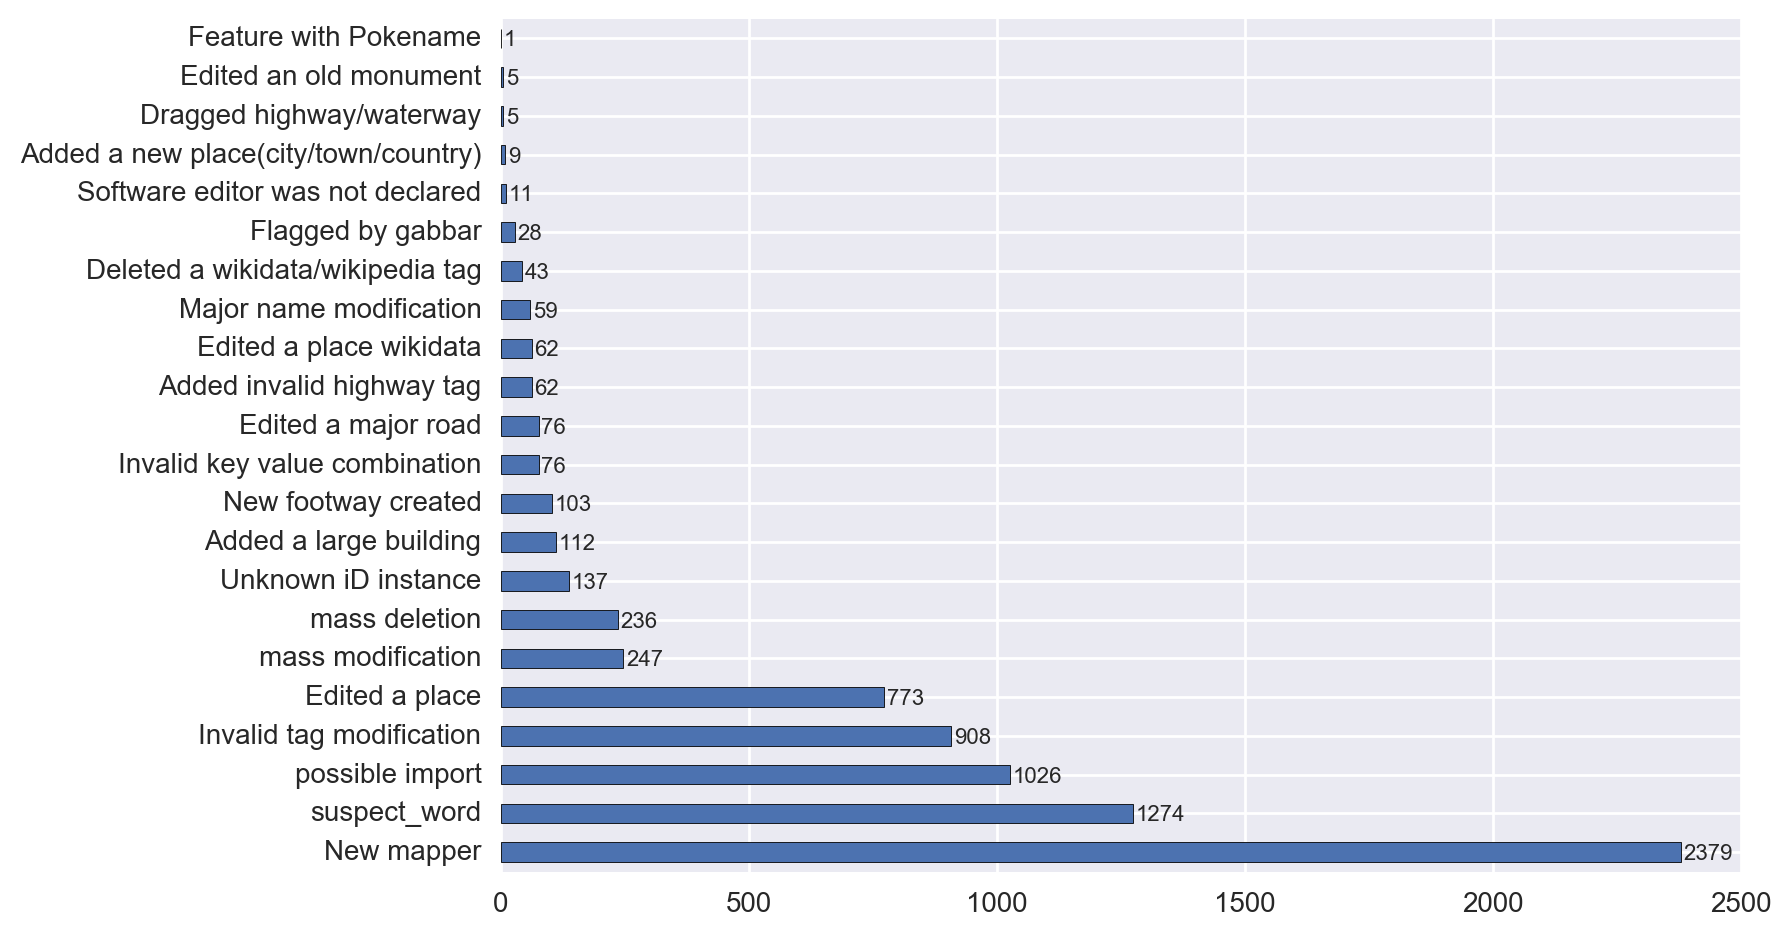

In [10]:
value_counts = changesets['reasons__name'].value_counts()
ax = value_counts.plot.barh()

for i, v in enumerate(value_counts.values):
    ax.text(v + 5, i - 0.18, str(v), fontsize=8)

In [11]:
# List of reasons on osmcha-django from osm-compare
comparators = [
    'Deleted an object having disputed tag',
    'Edited an object having disputed tag',
    'Added invalid highway tag',
    'Added a large building',
    'Edited a major road',
    'Edited a path road',
    'Edited a major lake',
    'New footway created',
    'Edited a place',
    'Major name modification',
    'Deleted a wikidata/wikipedia tag',
    'Feature near Null Island',
    'Feature with Pokename',
    'Dragged highway/waterway',
    'Edited a landmark wikidata/wikipedia',
    'Edited a place wikidata',
    'Edited an osm landmark',
    'Edited an old monument',
    'Added a new place(city/town/country)',
    'New user created a new water feature',
    'Invalid tag combination',
    'Invalid tag modification',
    'Invalid key value combination'
]

In [12]:
flagged_changesets = changesets[changesets['reasons__name'].isin(comparators)]
print('Changesets flagged by osm-compare: {}'.format(flagged_changesets.drop_duplicates('ID').shape[0]))

Changesets flagged by osm-compare: 2024


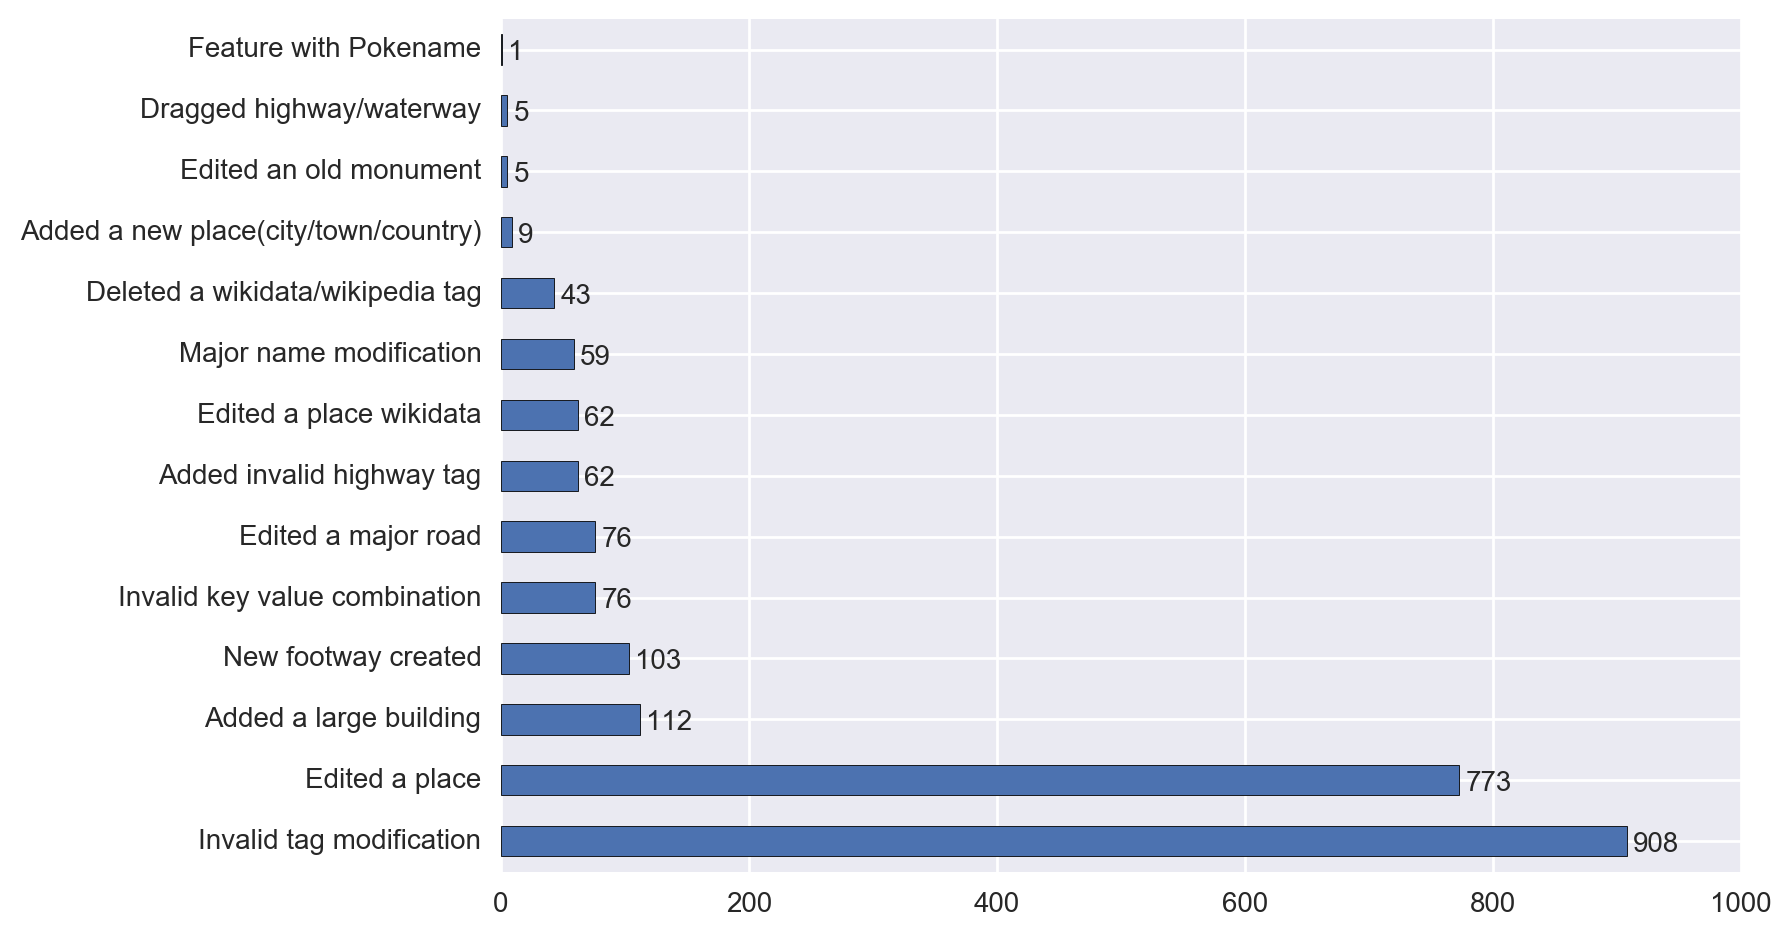

In [13]:
value_counts = flagged_changesets['reasons__name'].value_counts()
ax = value_counts.plot.barh()

for i, v in enumerate(value_counts.values):
    ax.text(v + 5, i - 0.16, str(v), fontsize=10)

In [14]:
table = []
for comparator in comparators:
    comparator_changesets = changesets[changesets['reasons__name'] == comparator]
    comparator_changesets_reviewed = comparator_changesets[comparator_changesets['checked'] == True]
    comparator_changesets_harmful = comparator_changesets[changesets['harmful'] == True]
    table.append([
        comparator,
        comparator_changesets.shape[0],
        comparator_changesets_reviewed.shape[0],
        comparator_changesets_harmful.shape[0]
    ])

table = sorted(table, key=lambda x: x[1], reverse=True)
# Insert the headers appropriately.
table.insert(0, [' --- '] * 4)
table.insert(0, ['comparator', 'flagged', 'flagged_and_reviewed', 'flagged_and_harmful'])

for row in table:
    print(' | '.join([str(item) for item in row]))

comparator | flagged | flagged_and_reviewed | flagged_and_harmful
 ---  |  ---  |  ---  |  --- 
Invalid tag modification | 908 | 52 | 2
Edited a place | 773 | 31 | 4
Added a large building | 112 | 7 | 0
New footway created | 103 | 6 | 1
Edited a major road | 76 | 4 | 0
Invalid key value combination | 76 | 2 | 0
Added invalid highway tag | 62 | 1 | 0
Edited a place wikidata | 62 | 0 | 0
Major name modification | 59 | 10 | 3
Deleted a wikidata/wikipedia tag | 43 | 2 | 0
Added a new place(city/town/country) | 9 | 4 | 0
Dragged highway/waterway | 5 | 0 | 0
Edited an old monument | 5 | 3 | 0
Feature with Pokename | 1 | 1 | 0
Deleted an object having disputed tag | 0 | 0 | 0
Edited an object having disputed tag | 0 | 0 | 0
Edited a path road | 0 | 0 | 0
Edited a major lake | 0 | 0 | 0
Feature near Null Island | 0 | 0 | 0
Edited a landmark wikidata/wikipedia | 0 | 0 | 0
Edited an osm landmark | 0 | 0 | 0
New user created a new water feature | 0 | 0 | 0
Invalid tag combination | 0 | 0 | 0
